# Basic Model

  $\frac{dS}{dt} = \nu  N - \frac{\beta  I  S} {N} - \mu S\\
  \frac{dE}{dt}=  \frac{\beta  I  S} {N} - (\sigma + \mu) E\\
  \frac{dI}{dt} = \sigma  E - (\alpha + \mu + \gamma) I\\
  \frac{dR}{dt} = \gamma I - \mu R $  
Hil Function not modelled in this notebook , but may add later
$H=(1 - m\times \frac{I^3} {k^3 + I^3}) $

# Beta

## Basis is valle 2013 paper  
Simplified from an spatially and age structured model
Force of Infection:  
$\delta=$ number of contacts per unit time X probability of disease transmission per contact X proportion of contacts that are infected  
$\delta= c_r   \times  \epsilon \times \tau \times  (1-e^{-\zeta d}) \times \frac{I}{N}$  

$[1-e^{\zeta d}]=[1]-e^{[{time/time}]}=$unitless  
$[\delta]=[c_r]$=individual/(individual x day)  

Transmissibility:  
$\beta = c_r   \times  \epsilon \times \tau \times  (1-e^{-\zeta d}) $  
$\beta=$ number of contacts per unit time X probability of disease transmission per contact  
$[\beta]=[c_r]=$individual/(individual x day)        

$\epsilon \times \tau \times  (1-e^{-\zeta d})$: probability of disease transmission per contact between I and S.  
$(1-e^{-\zeta d})$: probability of transmission based on the average duration of contacts. scaled between 0 and 1.

## Modification

- I have ignored susceptibility of susceptible ($\tau$) as my model does not have age structure and there is not likely to be residual immunity      
- I have removed the age and spatial structure
- I have kept $\epsilon$ in for now. It would make sense that there is a maximum possibly infectivity (not 100% of contacts will cause infection. 
- Modify "probability of disease transmission per contact"  

    1. find expected viral titre at time duration d if shedding occurs at rate a
    2. convert this into a (dimensionless) probability of infection. probability needs:
        - to increase as d increases( as contact longer, infection more likely)
        - to decreases as rate of decay increases (i.e s(growth rate) gets lower)(or b (rate of decay)=-s increases) 


### Basic equation:    

$\beta = c_r   \times  \epsilon \times  probability $  
$\beta=$ number of contacts per unit time x probability of disease transmission per contact  
$[\beta]=[c_r]=$individual/(individual x day) 


### Finding expected viral titre for time duration d if shedding occurs at rate a:  

$\frac{dV}{dd}=a-bV$   
$[\frac{dV}{dd}] =titre/(time x individual)-\frac { titre}{individual}\frac{1}{time}=titre/(individual  x time)$  
$V=\frac{a}{b}+ce^{-bd}$  
$[V]=\frac { titre}{time  x  individual}/ \frac{1}{time}+[c]e^{time/time}=\frac{titre}{individual}$  
units of c must be titre/individual   

initially t=0, V = 0:   
- $V=\frac{a}{b}+ce^{-b0}=0$  
- $-\frac{a}{b}=c$  

$V=\frac{a}{b}+-\frac{a}{b}e^{-bd}=\frac{a}{b}(1-e^{-bd})$   
b!=0

### Convert into a probability of infection:

$probability=\frac{\frac{a}{b}(1-e^{-bd})}{\frac{a}{b}(1-e^{-bd})+ah}=\frac{\frac{1}{b}(1-e^{-bd})}{\frac{1}{b}(1-e^{-bd})+h}$   

ah is the amount of virus shed in the time needed for transmission to occur
$[probability]=\frac{\frac{titre/(individual x time)}{1/time} [1-e^{-time/time}]}{\frac{titre/(individual x time)}{1/time} [1-e^{-time/time}]+[time x titre/(individual x time) ]}=\frac{titre/(individual x time)x time [1-e^{[-1]}]}{titre/(individual x time)x time [1-e^{[-1]}]+titre/(individual) }=\frac{titre/(individual)}{titre/(individual) +titre/(individual)}=unitless$

### Mechanistic interpretation of this :
  
#### why is there a plateau in V as duration of contact increases?
- $\frac{dV}{dd}=a-bV$  - both a and b are positive, so $\frac{dV}{dd}$ is decreasing so it will eventually reach 0 (this will be a stable fixed point). 
- Alternatively d and b are both positive so as d increases, $e^{-bd}$ tends to 0 and $\frac{a}{b}(1-e^{-bd})$  increases but tends to $\frac{a}{b}$. 
- why biologically?
    - increasing the duration of contact means that more shedding happens (a), so V increases
    - however as the duration of contact increases, there is also more decay of the virus.
    - a is not dependent on V but b is. The higher V is, the more the decay rate has to "act on".
    - the plateau is at V=a/b, where shedding balances decay
    - ( we are assuming that b is always positive. i.e. there is always decay rather than growth)
    

#### what does $\frac{a}{b}(1-e^{-bd})$ mean?  
- a/b is the maximum Viral titre (i.e where the plateau is) 
- b is the rate of decay per unit time (per day for example). so db is the rate of decay over the length of time that contact is occuring. 
- -bd because b is a decay so causes V to decrease
- $e^{-bd}$ is a measure of the how much V is reduced from the maximum by between 0 and 1 (proportion) based on the rate of decay and contact duration.
- so the proportion of the maximum V is $1-e^{-bd}$.
- this is multiplied by the maximum V (a/b -shedding rate x time to decay) to find the viral titre that is attained at this duration of time
- so $\frac{a}{b}(1-e^{-bd})$ is the maximum V multiplied 1- the proportion that V is reduced from the maximum based on the duration of time of contact and the decay rate.

#### why is $\frac{\frac{1}{b}(1-e^{-bd})}{\frac{1}{b}(1-e^{-bd})+h} $ used instead of $\frac{a}{b}(1-e^{-bd})$?  
-  $\frac{a}{b}(1-e^{-bd})$ is the viral titre per individual. This needs to be converted to a probability of infection. This is acheived by dividing it by itself +ah (where h is the mean duration of contact required for an infection to occur ($1/\zeta$)).
- ah is the amount of virus shed over time h (so an estimate of the amount of virus needed to be shed needed to cause infection). assuming d incorporates only shedding rate and not decay.
-  so $\frac{\frac{a}{b}(1-e^{-bd})}{\frac{a}{b}(1-e^{-bd})+ah} $ is a way of comparing the viral titre required for transmission with the actual viral titre. while keeping between 0 and 1 
- this can be simplified because a cancels
- still not fully sure how this works


#### what do $\frac{1}{b}(1-e^{-bd})$ and $\frac{\frac{1}{b}(1-e^{-bd})}{\frac{1}{b}(1-e^{-bd})+h} $  actually mean?
- 1/b is the expected survival time of virus particles. the survival time is reduced by the proportion $e^-{bd}$ so the new expected survival time is  $\frac{1}{b}(1-e^{-bd})$.
- This is divided by itself + h, where h is the estimated time needed for infection. So this is a way of comparing survival time with time needed for an infection to occur.



### potential issues
- this assumes that infection probability per contact is determined by viral titre per infected individual in the environment and that $\frac{dV}{dd}=a-bV$. It seems likely that the change viral titre in the environment is determined by the shedding rate and the rate of decay multiplied by amount of virus. However how this corresponds to infection is more uncertain and this is definitely a simplification of the processes that lead to infection. It assumes that viral load is important for the likelihood of infection (true? look for evidence) but it also assumes that fomites are the major cause of viral transmission, which is unlikely (ref). Respiratory droplet contact with mucus membranes are likely to be a key source of infection and aerosol transmission may play a role. These are unlikely to be described by the dynamics described here. 
    - Respiratory droplets- role of humidity? - but mostly just the closeness and time of contact. probably proportional to the overall duration of contact.


### overall equation :
$\beta = c_r   \times  \epsilon \times  \frac{\frac{1}{b}(1-e^{-bd})}{\frac{1}{b}(1-e^{-bd})+h} $  
$\beta=$ number contacts per unit time x probability of disease transmission per contact 
$[\beta]=[c_r]=individual/(individual x day) \times unitless $

### Climate dependence:
$\beta = c_r(C)   \times  \epsilon \times  \frac{\frac{1}{b(C)}(1-e^{-b(C)d(C)})}{\frac{1}{b(C)}(1-e^{-b(C)d(C)})+h} $  

### Parameters
day is the unit of time here.   
$c_r$ is contact rate per unit time  (individuals/(individual x time)   
$\epsilon$ is proportion of contacts that can cause transmission  
$\tau$ is the susceptibility of the susceptible.  
$\zeta$ is the number of transmission events per unit time (1/time)  
d is average contact duration of a contact (time)     
S is no of susceptibles  (individuals)   
I is no of infectives     (individuals)   
N is pop size (individuals)  
V is the net amount of virus per individual shedding (titre/individual)  
a is the amount of virus shed per individual per unit time (titre/(time x individual)  
b is the rate of decay of the virus (1/time)  
h is the expected duration of contact needed for tramsmission (time) (inverse of $\zeta$)



### How does beta vary with parameter values

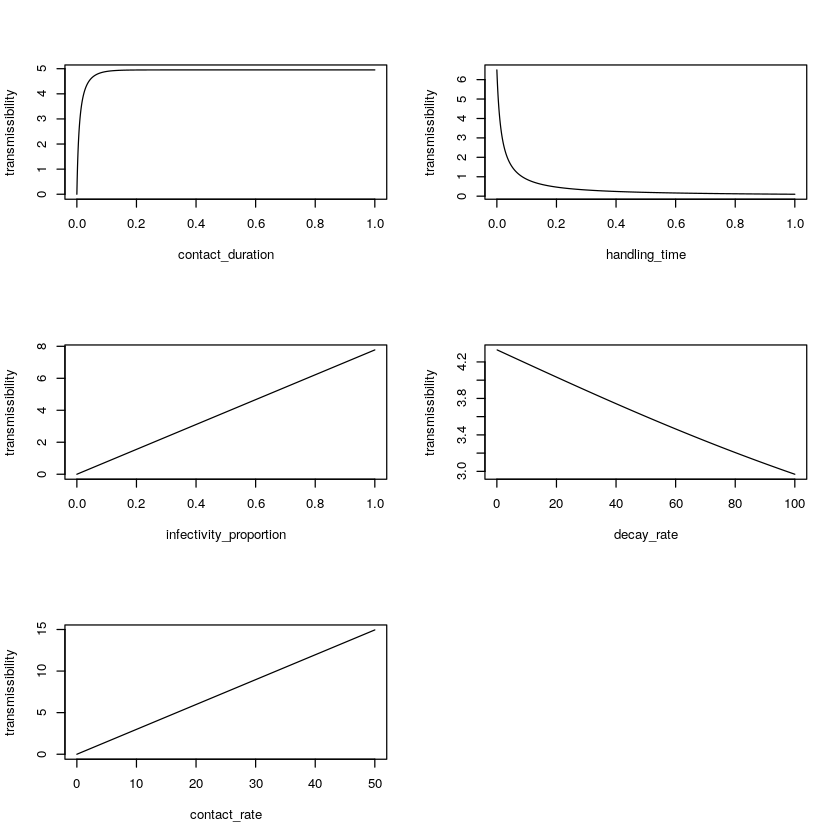

In [1]:
beta <-function(c_r,b,d,h,epsilon){
    return(c_r * epsilon *  (( (1 / b) * (1 - exp(- b * d)))/(( 1 / b) * (1 - exp(- b * d)) + h)))
}
             
#beta(c_r,b,d,h,epsilon)                                                 

parms = list(
contact_duration= 0.5 / 24,  #units -time(days)
handling_time=0.25 / 24, #days
infectivity_proportion=0.5, # maximum possibly transmissibility . not all contacts. eg in school
decay_rate= 30,  #decay (1/day)
contact_rate= 13
) #individuals/individual/day  
   
par(mfrow = c(3, 2))
for (i in 1:(length(parms))) {
  parmschange<- parms 
    if (i < 4) {
       x <- seq(0.000, 1, length.out = 1000)
        }
   if (i == 4){
        x <- seq(0.000, 100, length.out = 1000)
        }
   if (i == 5){
        x <- seq(0.000, 50, length.out = 1000)
        }

    parmschange[[i]] <- x
    transmissibility = beta(c_r= parmschange[["contact_rate"]],b= parmschange[["decay_rate"]],d= parmschange[["contact_duration"]],h= parmschange[["handling_time"]],epsilon= parmschange[["infectivity_proportion"]])
    
    plot(x,transmissibility, type = "l", xlab = names(parms[i]))
}




# Climate and beta:   
social behaviour- d, c_r likely to be effected  
effects of climate on virus : s 

assume that d and c_r will peak at the same point 







## Temperature

In [2]:
#Estimating mean contact duration


library(socialmixr)
data("polymod")
data <- polymod$contacts
contact_table <- table(data$part_id, data$duration_multi)
#seems to be shifted 
del <- as.numeric(names(which(contact_table[, 1] > 0)))
data <- data[which(data$part_id != del), ]
contact_table <- table(data$part_id, data$duration_multi)
con <- as.matrix(contact_table)
#midpoints <- c(2.5, 10, 15 + (60 - 45) / 2, 150, 4 * 60)
#time <- midpoints * con / 60

#timebyrow <- apply(time, 1, sum)
#meancont<-mean(timebyrow)
#maxcont<-meancont+2*sqrt(var(timebyrow))

#max(timebyrow)
#min(timebyrow)
timebyrow <- rowSums(con)

meancontactno<-mean(timebyrow)
varcontactno<-var(timebyrow)
# maxcontactno<-max(timebyrow)
#I think my  decisions here are pret
numberbycol<- colSums(con)
numberbycol
#most frequently- 4h+ so est 4h?


Attaching package: ‘socialmixr’

The following object is masked from ‘package:utils’:

    cite



1     2     3     4     5 
13417 15302 18030 23220 26485

In [3]:
#estimating quadratic for mortality of virus
mortality_quadratic <- function(T, vertex , point) {
     
   #vertex is the maxima or minima, point is another point on the curve (usually min o)
   #scaled between 0 and 1 
   #finds a b and c
   #remember that applies only to T_range
   #find coefficients 
  
  
   a = ((point[2] - vertex[2]) / (point[1] - vertex[1]) ^ 2) 
   b = (((point[2] - vertex[2]) / (point[1] - vertex[1]) ^ 2) * -2 * vertex[1]) 
   c = (((point[2] - vertex[2]) / (point[1] - vertex[1]) ^ 2) * vertex[1] ^2 + vertex[2]) 

   return(a* T ^ 2 + b * T + c)
}
# if type of standard deviation (stype) ==1 then use upper to find s ,else use lower. 
#This is to solve the issue that if maximum occurs at upper confidence interval, s will be 0. 





In [4]:
par(mfrow=c(2,1))


#function for contact rate
#con <- function(T, m, s) {
#   #finds equation given coordinates at maximum (m) temp and standard deviation
#   scaling = sqrt(2 * pi) * s * m[2]
   #uses equation to find contact rate at given T values 
#   return(scaling*(1 / (sqrt(2 * pi) * s))*exp((-(T - m[1]) ^ 2) / (2 * s^ 2)))
#}

#function for mean duration of contact
cr_normal <- function(T, m , c, stype) {
    #parameters
    #m is the cooredinates where the contact rate is at a maximum 
    #c is 95 % confidence interval for duration
    #t range is the T values the function is calculated for
    #s type determines whether s is calculated using the upper or lower confidence interval
    c_u = c[2]
    c_l = c[1]
    m_T = m[1]
    m_cr = m[2]
    #find s
    if (stype==1){
       s = (c_u - m_T) / 1.96
       }else{
          s = -(c_l - m_T) / 1.96
       }
  #find y axis of normal distribution given s   
     scaling = sqrt(2 * pi) * s * m_cr

    return(scaling*(1 / (sqrt(2 * pi) * s))*exp((-(T - m_T) ^ 2) / (2 * s ^ 2)))
}


#this is where confidence_interval is used 
cr <- function(temp_at_max, range, T) {
   #finds the equation fiven temp_at_max and range. then finds S for given T
   #uses where temp at max relates to range to determine stype (to determine whether lower or upper value of range is used to find SI)
   if (abs(temp_at_max-range[1])>abs(temp_at_max-range[2])){
      stype=0
      }else{
         stype=1
      }
   #finds d at T values for given parameters (contact finds equation using duration_normal_scaled)
   #t_range not strictly needed 
   #return(mean_duration(T = T,m = c(temp_at_max, max_mean_contact), c = confidence_interval, T_range = range, stype=stype))
   return(cr_normal(T = T,m = c(temp_at_max, max_contact_no), c = confidence_interval_cr, stype=stype))

   
}



#function for mean duration of contact
mean_duration_normal <- function(T, m , c, stype) {
    #parameters
    #m is the cooredinates where the duration is at a maximum 
    #c is 95 % confidence interval for duration
    #t range is the T values the function is calculated for
    #s type determines whether s is calculated using the upper or lower confidence interval
    #T = seq(T_range[1], T_range[2], length.out = 10000)
    c_u = c[2]
    c_l = c[1]
    m_T = m[1]
    m_d = m[2]
    #find s
    if (stype==1){
       s = (c_u - m_T) / 1.96
       }else{
          s = -(c_l - m_T) / 1.96
       }
  #find y axis of normal distribution given s   
     scaling = sqrt(2 * pi) * s * m_d

    return(scaling*(1 / (sqrt(2 * pi) * s))*exp((-(T - m_T) ^ 2) / (2 * s ^ 2)))
}


#this is where confidence_interval is used 
d <- function(temp_at_max, range, T) {
   #finds the equation fiven temp_at_max and range. then finds S for given T
   #uses where temp at max relates to range to determine stype (to determine whether lower or upper value of range is used to find SI)
   if (abs(temp_at_max-range[1])>abs(temp_at_max-range[2])){
      stype=0
      }else{
         stype=1
      }
   #finds d at T values for given parameters (contact finds equation using duration_normal_scaled)
   #t_range not strictly needed 
   #return(mean_duration(T = T,m = c(temp_at_max, max_mean_contact), c = confidence_interval, T_range = range, stype=stype))
   return(mean_duration_normal(T = T,m = c(temp_at_max, max_mean_contact), c = confidence_interval_d, stype=stype))

   
}



In [5]:
#setting parameters 
#S
max_survival<- -0.0001
min_survival<- -40
# d
max_mean_contact<-4/24
confidence_interval_d<-c(-30,60)
#cr
confidence_interval_cr<-c(-30,60)
max_contact_no<-40

T_range<-seq(-10,40,length.out = 1000)


q <- function(temp_at_max, range, T) {
   #this function uses the temp at max and range to decide which end of range to allocate as minimum.
   #then finds the equation for the given range and temp at max and finds S for given T 
   #uses specific min and max y values. should probably move that to input
    
   # the temp at min is the lower end of the range when the temp at max is closer to the upper end of the range and vice versa
   #this is because the quadratic is symmetric and bounded     
   if (temp_at_max > (range[2] - range[1]) / 2) {
       temp_at_min <- range[1]
      }else{
        temp_at_min <- range[2]
      } 
    #outputs y value for temperature when vertexc, T_range and point are at values here
    return(mortality_quadratic(T = T, vertex = c(temp_at_max, max_survival), point = c(temp_at_min, min_survival)))
}




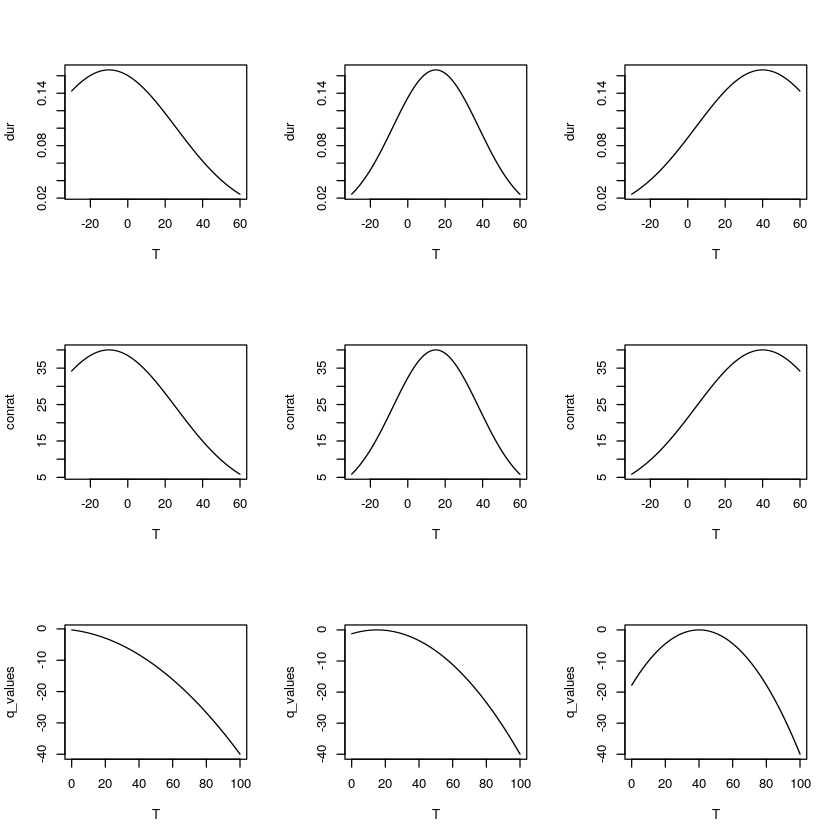

In [6]:
par(mfrow=c(3,3))
plotting_d <- function(maxvec, range) {
   #plots for different maximum temperatures
   T = seq(range[1], range[2] , length.out = 1000)
   for (i in maxvec) {
       #uses the value of maxvec to "decide" stype(decide whether lower or upper confidence interval is used to calculate standard deviation)
 #     #find C and plot given specific parameters
      dur= d(T = T, range=range, temp_at_max = i)
      plot(T, dur, type = "S")
   } 
    }
plotting_d(maxvec = c(-10, 15, 40), range = c(-30, 60))

plotting_con <- function(maxvec, range) {
   #plots for different maximum temperatures
   T = seq(range[1], range[2] , length.out = 1000)
   for (i in maxvec) {
       #uses the value of maxvec to "decide" stype(decide whether lower or upper confidence interval is used to calculate standard deviation)
 #     #find C and plot given specific parameters
      conrat=con(T,m=c(i,meancontactno),s=sqrt(varcontactno)*3)
      plot(T, conrat, type = "S")
   } 
    }
plotting_cr <- function(maxvec, range) {
   #plots for different maximum temperatures
   T = seq(range[1], range[2] , length.out = 1000)
   for (i in maxvec) {
       #uses the value of maxvec to "decide" stype(decide whether lower or upper confidence interval is used to calculate standard deviation)
 #     #find C and plot given specific parameters
      conrat=cr(T=T ,range = range, temp_at_max=i)
      plot(T, conrat, type = "S")
   } 
    }
plotting_cr(maxvec = c(-10, 15, 40), range = c(-30, 60))

plotting_q <- function(maxvec, range) {
  #plots for different maximum temperatures 
   T = seq(range[1], range[2] , length.out = 1000)
   for (i in maxvec) {
      temp_at_max <- i
     # the temp at min is the lower end of the range when the temp at max is closer to the upper end of the range and vice versa
      #this is because the quadratic is symmetric and bounded    
     # if (i > (range[2] - range[1]) / 2) {
     #    temp_at_min <- range[1]
    #     }else{
    #        temp_at_min <- range[2]
     #    }
 #     #survival function finds equation given vertex, trange and point, then finds S for chosen T values  
      #q= Survival(T = T, vertex = c(temp_at_max, max_survival),T_range = range, point = c(temp_at_min, min_survival))
      q_values= q(T = T,range=range,temp_at_max = temp_at_max)

      plot(T, q_values, type = "s")
   }
}

plotting_q(maxvec = c(-10, 15, 40), range = c(0, 100))
#BUG HERE- IF RANGE DIFFERENT

#b=-q. These graphs show peak varying according to what is best for virus

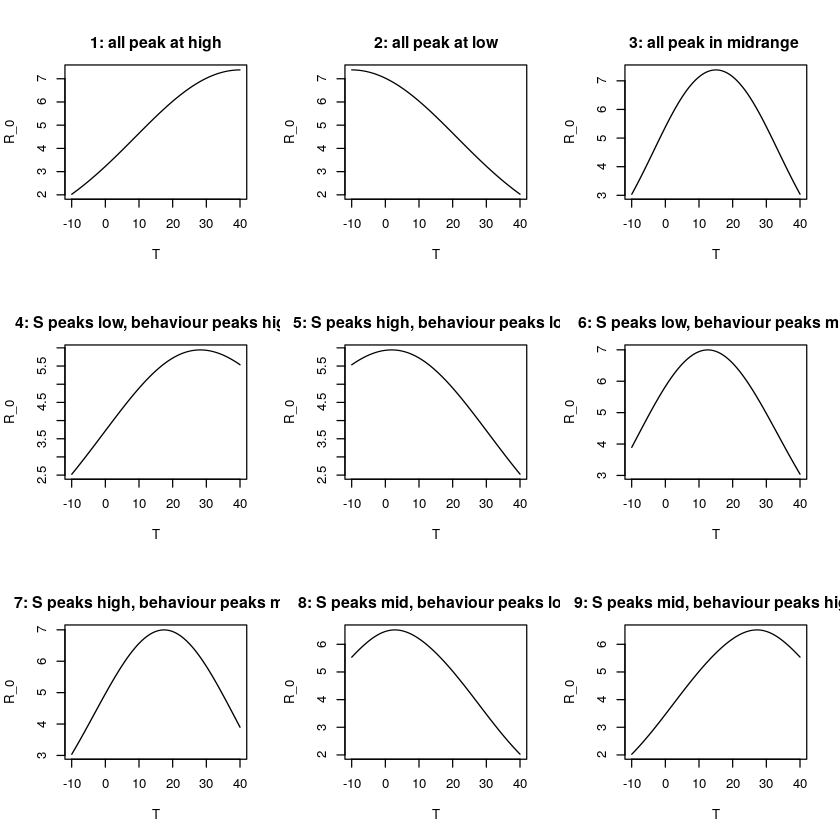

In [7]:
#plotting R0
par(mfrow = c(3, 3))
#d<- 0.25 / 24  #units -time(days)
h<-0.25 / 24 #days
epsilon=0.05 # maximum possibly transmissibility . not all contacts. eg in school
#k<- -30  #decay (1/day)
#c_r<-13 #individuals/individual/day  



mu = 0
sigma = 0.25
alpha = 0.005
gamma = 0.25

range = c(-10, 40)
T = seq(range[1], range[2] , length.out = 1000)
#completely susceptible population
#maxes is a matrix with different combinations of maximum for S, cr ,d 

maxes<-matrix(c(range[2],range[2],range[2],range[1],range[1],range[1],
                range[1] +((range[2] - range[1]) / 2), range[1] + ((range[2] - range[1]) / 2),range[1] + ((range[2] - range[1]) / 2),
                range[1],range[2],range[2],
                range[2],range[1],range[1],
                range[1],range[1] +((range[2] - range[1]) / 2), range[1] + ((range[2] - range[1]) / 2),
                range[2],range[1] +((range[2] - range[1]) / 2), range[1] + ((range[2] - range[1]) / 2),
              range[1] +((range[2] - range[1]) / 2),range[1],range[1],
              range[1] +((range[2] - range[1]) / 2),range[2],range[2]),
              byrow=T, nrow=9,ncol=3)
titles<-c("
1: all peak at high","
2: all peak at low","
3: all peak in midrange ","
4: S peaks low, behaviour peaks high","
5: S peaks high, behaviour peaks low ","
6: S peaks low, behaviour peaks mid","
7: S peaks high, behaviour peaks mid","
8: S peaks mid, behaviour peaks low","
9: S peaks mid, behaviour peaks high")
for (a in 1:nrow(maxes)){
    d_value<-d(temp_at_max = maxes[a,3],range = range, T=T)
    #cr_value<-cr(T = T,m =c(maxes[a,2],meancontactno) ,s=sqrt(varcontactno)*3)
    
    cr_value<-cr(temp_at_max = maxes[a,2],range = range,T = T)

    b_value<- -q(temp_at_max = maxes[a,1],range = range, T=T) #b=-q
 ###   #print(duration)
   ## #print(contact_rate)
   ### #print(growth)
    beta_value = beta(c_r = cr_value,b =b_value ,d = d_value,h =h ,epsilon =epsilon )
    R_0 <-(sigma / (sigma + mu)) * beta_value/(mu + alpha + gamma)
    plot(T, R_0, type = "s", main=titles[a])
}

#third and 5th parameters used fur simulations further down

#1 all peak at high
#2 all peak at low
#3 all peak in midrange 
#4 S peaks low, behaviour peaks high
#5 S peaks high, behaviour peaks low 
#6 S peaks low, behaviour peaks mid
#7 S peaks high, behaviour peaks mid
#8 S peaks mid, behaviour peaks low
#9 S peaks mid, behaviour peaks high

In [8]:
require("epimdr")

Loading required package: epimdr
Loading required package: shiny
Loading required package: deSolve
Loading required package: polspline


In [9]:
Temp<- function(time,min,max) {
  # here, T is varying with time at a yearly cycle.
  return((max-min)/2 * cos((2 * pi / 365)* time - pi) + (max+min)/2)
}

#T<-seq(0,400,length.out = 1000)
#Y<-Temp(T,-10,40)
#plot(T,Y)
model <- function(time, values, parms) {
   #function where c changes with the climate and humidity at each timepoint
  
   #initial values
   S <- values[1]
   E <- values[2]
   I <- values[3]
   R <- values[4]
   N <- values[5]
   #parameters
   mu <- parms[["mu"]]
   sigma <- parms[["sigma"]]
   alpha <- parms[["alpha"]]
   gamma <- parms[["gamma"]]
   h <- parms[["h"]]
   epsilon <- parms[["epsilon"]]
   range <-parms[["range"]]
   nu <- parms[["nu"]]
   #N <- parms[["N"]]
   choose <- parms[["choose"]]

   #find temperature given time
   T <- Temp(time=time,min=range[1],max=range[2])

    d_value<-d(temp_at_max = maxes[p,3],range = range, T=T)
   
   #cr_value<-cr(T = T,m =c(maxes[p,2],meancontactno) ,s=sqrt(varcontactno))
    cr_value<-cr(temp_at_max = maxes[p,2],range = range,T = T)

    b_value<- -q(temp_at_max = maxes[p,1],range = range, T=T) #b=-q
  
    beta_value = beta(c_r = cr_value,b =b_value ,d = d_value,h =h ,epsilon =epsilon )
   #seir model
   dS = nu * N - beta_value * I * S / N - mu * S 
   dE = beta_value * S * I / N - (sigma + mu) * E
   dI = sigma * E - (alpha + mu + gamma) * I
   dR = gamma * I - mu * R 
   dN = nu * N- alpha * I - mu * (S+E+I+R)
  list(c(dS, dE, dI, dR, dN))
}



plottime <- function(start, time, model, parms) {
   #plotting seir components over time
    out = ode(    y = start,    time = time,    func = model,    parms = parms  )
   #Nvec<-out[, "S"] + out[, "E"] + out[, "I"] + out[, "R"]
   #out<-cbind( out, Nvec)
   plot(x = out[, "time"], y= out[, "S"], ylab = "Number", xlab = "Time",
        type = "l", xlim=c(min(time), max(time)),ylim=c(0, parms[["N"]]))
   lines(x = out[, "time"],y= out[, "E"], col = "orange")
   lines(x = out[, "time"],y= out[, "I"], col = "red")
   lines(x = out[, "time"],y= out[, "R"], col = "green")
   lines(x = out[, "time"],y= out[, "N"], col = "purple")  
   abline(h = max(out[,"I"]),lty=3,col="red")
   legend( "bottomright",legend = c("S", "E", "I", "R","N","Max I"), 
          col = c("black", "orange", "red", "green","purple","red"), lty = c(1,1,1,1,1,3), cex = 0.8)
   maxpercent=max(( out[, "I"]/ out[, "N"])*100)
   maximum= paste("Maximum I is:",round(maxpercent,digits = 2),"%")
   text(max(time)/2, max(out[, "N"]),maximum)
   title(main=paste("q peaks at",maxes[p,1],", cr peaks at",maxes[p,2], ", d peaks at",maxes[p,3]))
    #plotting infection numbers over time
   # plot(x = out[, "time"],   y= out[, "I"] ,    ylab = "Number",   xlab = "Time",    
    #   type = "l",   xlim=c(min(time), max(time)),  ylim=c(0, max(out[,"I"]))) 
}
time = seq(0,1000, by = 0.01)

for (p in 1:nrow(maxes)){
parms1 = list( mu = 00.000,sigma = 0.25 ,alpha = 0.005, gamma =0.25,
               N = 10000, nu = 0.0, range = c(-10,40), h=0.25 / 24 ,epsilon= 0.05, choose=p)

start = c(S = 0.999*parms1[["N"]],
          E = 0.001*parms1[["N"]],
          I = 0.00*parms1[["N"]],
          R = 0*parms1[["N"]],
          N = parms1[["N"]])
png(paste("../../Results/Series/Series_",p,".png"))
plottime(time = time,parms = parms1,start = start,  model = model)
dev.off()
    }



##  Generic Climate

How to include both humidity and temperature?
- Climate is a function of time , and d,b,cr are functions of climate
- Combined_Climate=C_C(T,RH)=$c_1 T + c_2RH$ - linear combination of RH and T
    - How would I parameterise this!- so equal contribution? scale?
    - Is a linear combination likely/possible
    - unsure if this would differentiate between high temperature and high humidity. does this matter
    - may well be a better way to do this
    
- d(Combined_Climate, Combined_Climate_Confidence_Interval,Combined_Climate_Maximum...; cr(Combined_Climate, Combined_Climate_Confidence_Interval,Combined_Climate_Maximum...; b(Combined_Climate, Combined_Climate_Minima,Combined_Climate_Maximum...)
    - Combined_Climate is found by applying $c_1 T + c_2RH$ to required temperatures and humidities
    -  The climate at maxima and minimima are applied by applying $c_1 T + c_2RH$ to temperature and humidity where the value is highest or lowest (from appropriate literature)
    - The confidence interval could be estimated by finding the maximum and minimum values of C possible/feasible from $c_1 T + c_2RH$ and data 
- Combined_Climate_Function(time,max,min)
    - max and min are found by applying $c_1 T + c_2RH$ temp and humidity and min and max
    - time is the time range over which to apply sinusoidal climate function
    - may also need to incorporate a shift
    

Below is a version of above code using Combined_Climate instead of Temperature, however the Combined_Climate values used are not meaningful. below this is a better code doing the same thing

In [ ]:
#Estimating mean contact duration


library(socialmixr)
data("polymod")
data <- polymod$contacts
contact_table <- table(data$part_id, data$duration_multi)
#seems to be shifted 
del <- as.numeric(names(which(contact_table[, 1] > 0)))
data <- data[which(data$part_id != del), ]
contact_table <- table(data$part_id, data$duration_multi)
con <- as.matrix(contact_table)
#midpoints <- c(2.5, 10, 15 + (60 - 45) / 2, 150, 4 * 60)
#time <- midpoints * con / 60

#timebyrow <- apply(time, 1, sum)
#meancont<-mean(timebyrow)
#maxcont<-meancont+2*sqrt(var(timebyrow))

#max(timebyrow)
#min(timebyrow)
timebyrow <- rowSums(con)

meancontactno<-mean(timebyrow)
varcontactno<-var(timebyrow)

numberbycol<- colSums(con)
numberbycol
#most frequently- 4h+ so est 4h?

In [ ]:
#setting parameters 
#S
max_survival<- -0.0001
min_survival<- -40
# d
max_mean_contact<-4/24
confidence_interval_d<-c(20,80)

#cr
confidence_interval_cr<-c(20,80)

max_contact_no<-40

maxvec=c(0,50,100)
range=c(0,100)


C_range<-seq(0,100,length.out = 1000)

In [ ]:
#estimating quadratic for mortality of virus
mortality_quadratic <- function(Combined_Climate, vertex , point) {
     
   #vertex is the maxima or minima, point is another point on the curve (usually min o)
   #scaled between 0 and 1 
   #finds a b and c
   #remember that applies only to C_range
   #find coefficients 
   # C_range is range of climate suitibilities
  
  
   a = ((point[2] - vertex[2]) / (point[1] - vertex[1]) ^ 2) 
   b = (((point[2] - vertex[2]) / (point[1] - vertex[1]) ^ 2) * -2 * vertex[1]) 
   c = (((point[2] - vertex[2]) / (point[1] - vertex[1]) ^ 2) * vertex[1] ^2 + vertex[2]) 
 
   return(a* Combined_Climate ^ 2 + b * Combined_Climate + c)
}
# if type of standard deviation (stype) ==1 then use upper to find s ,else use lower. 
#This is to solve the issue that if maximum occurs at upper confidence interval, s will be 0. 





In [ ]:
par(mfrow=c(2,1))

##########################################
cr_normal <- function(Combined_Climate, m , c, stype) {
    #parameters
    #m is the cooredinates where the contact rate is at a maximum 
    #c is 95 % confidence interval for duration
    #t range is the T values the function is calculated for
    #s type determines whether s is calculated using the upper or lower confidence interval
    c_u = c[2]
    c_l = c[1]
    m_C = m[1]
    m_cr = m[2]
    #find s
    if (stype==1){
       s = (c_u - m_C) / 1.96
       }else{
          s = -(c_l - m_C) / 1.96
       }
  #find y axis of normal distribution given s   
     scaling = sqrt(2 * pi) * s * m_cr

    return(scaling*(1 / (sqrt(2 * pi) * s))*exp((-(Combined_Climate - m_C) ^ 2) / (2 * s ^ 2)))
}


#this is where confidence_interval is used 
cr <- function(Combined_Climate_at_Max, range, Combined_Climate) {
   #finds the equation fiven temp_at_max and range. then finds S for given T
   #uses where temp at max relates to range to determine stype (to determine whether lower or upper value of range is used to find SI)
   if (abs(Combined_Climate_at_Max-range[1])>abs(Combined_Climate_at_Max-range[2])){
      stype=0
      }else{
         stype=1
      }
   #finds d at T values for given parameters (contact finds equation using duration_normal_scaled)
   #t_range not strictly needed 
   #return(mean_duration(T = T,m = c(temp_at_max, max_mean_contact), c = confidence_interval, T_range = range, stype=stype))
   return(cr_normal(Combined_Climate = Combined_Climate,m = c(Combined_Climate_at_Max, max_contact_no), c = confidence_interval, stype=stype))
   
}












#function for contact rate
con <- function(Combined_Climate, m,s) {
#   #finds equation given coordinates at where climate suitability peaks (m) and standard deviation of contact
   scaling = sqrt(2 * pi) * s * m[2]
   #uses equation to find contact rate at given Combined_Climate values 
   return(scaling*(1 / (sqrt(2 * pi) * s))*exp((-(Combined_Climate - m[1]) ^ 2) / (2 * s^ 2)))
}





#function for mean duration of contact
mean_duration_normal <- function(Combined_Climate, m , c, stype) {
    #parameters
    #m is the cooredinates where the duration is at a maximum 
    #c is 95 % confidence interval for duration
    #t range is the T values the function is calculated for
    #s type determines whether s is calculated using the upper or lower confidence interval
    #T = seq(T_range[1], T_range[2], length.out = 10000)
    c_u = c[2]
    c_l = c[1]
    m_C = m[1]
    m_d = m[2]
    #find s
    if (stype==1){
       s = (c_u - m_C) / 1.96
       }else{
          s = -(c_l - m_C) / 1.96
       }
  #find y acis of normal distribution given s   
   #N_D =  (1 / (sqrt(2 * pi) * s)) *  exp((-(T - m_T) ^ 2) / (2 * s ^ 2))
   #d = N_D * sqrt(2 * pi) * s
     scaling = sqrt(2 * pi) * s * m_d
 
   #plot(T,d)
   #return(c(scaling, m_T, s))
    return(scaling*(1 / (sqrt(2 * pi) * s))*exp((-(Combined_Climate - m_C) ^ 2) / (2 * s ^ 2)))
}

#mean_duration <- function(T, m, c, T_range,stype) {
#   #finds equation given coordinates at maximum (m), upper and lower confidence interval (c), and range of T, and stype
#   eq <- mean_duration_normal(m, c, T_range,stype)#

    #uses equation to find contact duration at given T values 
   #need to work on c means, if c=T here then doesn't work because not enough density???- think this issue is solved with stype
#   return(eq[1]*(1 / (sqrt(2 * pi) * eq[3]))*exp((-(T - eq[2]) ^ 2) / (2 * eq[3] ^ 2)))
#}




d <- function(Combined_Climate_at_Max, range, Combined_Climate) {
   #finds the equation fiven temp_at_max and range. then finds duration for given Combined_Climate
   #uses where temp at max relates to range to determine stype (to determine whether lower or upper value of range is used to find SI)
   if (abs(Combined_Climate_at_Max-range[1])>abs(Combined_Climate_at_Max-range[2])){
      stype=0
      }else{
         stype=1
      }
   #finds d at T values for given parameters (contact finds equation using duration_normal_scaled)
   #t_range not strictly needed 
   #return(mean_duration(T = T,m = c(temp_at_max, max_mean_contact), c = confidence_interval, T_range = range, stype=stype))
   return(mean_duration_normal(Combined_Climate = Combined_Climate,m = c(Combined_Climate_at_Max, max_mean_contact), c = confidence_interval_d, stype=stype))

   
}



In [ ]:

q <- function(Combined_Climate_at_Max, range, Combined_Climate) {
   #this function uses the temp at max and range to decide which end of range to allocate as minimum.
   #then finds the equation for the given range and temp at max and finds S for given T 
   #uses specific min and max y values. should probably move that to input
    
   # the temp at min is the lower end of the range when the temp at max is closer to the upper end of the range and vice versa
   #this is because the quadratic is symmetric and bounded     
   if (Combined_Climate_at_Max > (range[2] - range[1]) / 2) {
       Combined_Climate_at_Min <- range[1]
      }else{
        Combined_Climate_at_Min <- range[2]
      } 
    #outputs y value for temperature when vertexc, T_range and point are at values here
    return(mortality_quadratic(Combined_Climate = Combined_Climate,vertex = c(Combined_Climate_at_Max, max_survival), point = c(Combined_Climate_at_Min, min_survival)))
}




In [ ]:


par(mfrow=c(3,3))
plotting_d <- function(maxvec, range) {
   #plots for different maximum temperatures
   Combined_Climate = seq(range[1], range[2] , length.out = 1000)
   for (i in maxvec) {
       #uses the value of maxvec to "decide" stype(decide whether lower or upper confidence interval is used to calculate standard deviation)
 #     #find C and plot given specific parameters
      dur= d(Combined_Climate =  Combined_Climate, range=range, Combined_Climate_at_Max = i)
      plot(Combined_Climate, dur, type = "S")
   } 
    }
plotting_d(maxvec = maxvec, range = range)

plotting_cr <- function(maxvec, range) {
   #plots for different maximum climate suitibilities
   Combined_Climate = seq(range[1], range[2] , length.out = 1000)
   for (i in maxvec) {
       #uses the value of maxvec to "decide" stype(decide whether lower or upper confidence interval is used to calculate standard deviation)
 #     #find C and plot given specific parameters
      #conrat=cr(Combined_Climate=Combined_Climate,m=c(i,meancontactno),s=sqrt(varcontactno)*3)
      conrat=cr(Combined_Climate =  Combined_Climate, range=range, Combined_Climate_at_Max = i)

      plot(Combined_Climate, conrat, type = "S")
   } 
    }
plotting_cr(maxvec = maxvec, range=range)

plotting_q <- function(maxvec, range) {
  #plots for different maximum temperatures 
   Combined_Climate = seq(range[1], range[2] , length.out = 1000)
   for (i in maxvec) {
      Combined_Climate_at_Max <- i
     # the temp at min is the lower end of the range when the temp at max is closer to the upper end of the range and vice versa
      #this is because the quadratic is symmetric and bounded    
      if (i > (range[2] - range[1]) / 2) {
         Combined_Climate_at_Min <- range[1]
         }else{
          Combined_Climate_at_Min <- range[2]
         }
 #     #survival function finds equation given vertex, trange and point, then finds S for chosen T values  
      #q= Survival(T = T, vertex = c(temp_at_max, max_survival),T_range = range, point = c(temp_at_min, min_survival))
      q_values= q(Combined_Climate=Combined_Climate, range=range, Combined_Climate_at_Max=Combined_Climate_at_Max)

      plot(Combined_Climate, q_values, type = "s")
   }
}

plotting_q(maxvec = maxvec, range =range)

#b=-q. These graphs show peak varying according to what is best for virus

In [ ]:
#plotting R0
par(mfrow = c(3, 3))


h<-0.25 / 24 #days
epsilon=0.05 # maximum possibly transmissibility . not all contacts. eg in school

mu = 0
sigma = 0.25
alpha = 0.005
gamma = 0.25
#CI_Range<-c(0,100)
range = c(0,100)
Sequence<-seq(range[1], range[2] , length.out = 1000)
Combined_Climate= Sequence
#temperature
#Temp_Range<-c(-10,40)
#Temp_Sequence= seq(Temp_Range[1], Temp_Range[2] , length.out = 1000)
#Combined_Climate <-Temp_Sequence

#completely susceptible population
#maxes is a matrix with different combinations of maximum for S, cr ,d 

maxes<-matrix(c(range[2],range[2],range[2],range[1],range[1],range[1],
                range[1] +((range[2] - range[1]) / 2), range[1] + ((range[2] - range[1]) / 2),range[1] + ((range[2] - range[1]) / 2),
                range[1],range[2],range[2],
                range[2],range[1],range[1],
                range[1],range[1] +((range[2] - range[1]) / 2), range[1] + ((range[2] - range[1]) / 2),
                range[2],range[1] +((range[2] - range[1]) / 2), range[1] + ((range[2] - range[1]) / 2),
              range[1] +((range[2] - range[1]) / 2),range[1],range[1],
              range[1] +((range[2] - range[1]) / 2),range[2],range[2]),
              byrow=T, nrow=9,ncol=3)
titles<-c("
1: all peak at high","
2: all peak at low","
3: all peak in midrange ","
4: S peaks low, behaviour peaks high","
5: S peaks high, behaviour peaks low ","
6: S peaks low, behaviour peaks mid","
7: S peaks high, behaviour peaks mid","
8: S peaks mid, behaviour peaks low","
9: S peaks mid, behaviour peaks high")
for (a in 1:nrow(maxes)){
    d_value<-d(Combined_Climate_at_Max = maxes[a,3],range = range, Combined_Climate=Combined_Climate)
    cr_value<-cr(Combined_Climate =  Combined_Climate, range=range, Combined_Climate_at_Max =maxes[a,2])

    #cr_value<-cr(Combined_Climate=Combined_Climate,m =c(maxes[a,2],meancontactno) ,s=sqrt(varcontactno)*3)
    b_value<- -q(Combined_Climate_at_Max = maxes[a,1],range = range, Combined_Climate=Combined_Climate) #b=-q
 ###   #print(duration)
   ## #print(contact_rate)
   ### #print(growth)
    beta_value = beta(c_r = cr_value,b =b_value ,d = d_value,h =h ,epsilon =epsilon )
    R_0 <-(sigma / (sigma + mu)) * beta_value/(mu + alpha + gamma)
    plot(Combined_Climate, R_0, type = "s", main=titles[a])
    #plot(Combined_Climate, beta_value, type = "s")

}


#1 all peak at high Combined_Climate
#2 all peak at low Combined_Climate
#3 all peak in midrange Combined_Climate
#4 S peaks low, behaviour peaks high
#5 S peaks high, behaviour peaks low 
#6 S peaks low, behaviour peaks mid
#7 S peaks high, behaviour peaks mid
#8 S peaks mid, behaviour peaks low
#9 S peaks mid, behaviour peaks high

In [ ]:
require("epimdr")


In [ ]:
Combined_Climate_Function<- function(time,min,max) {
  # here, climate is varying with time at a yearly cycle.
  return((max-min)/2 * cos((2 * pi / 365)* time - pi) + (max+min)/2)
}

range = c(20,100)
maxes<-matrix(c(range[2],range[2],range[2],range[1],range[1],range[1],
                range[1] +((range[2] - range[1]) / 2), range[1] + ((range[2] - range[1]) / 2),range[1] + ((range[2] - range[1]) / 2),
                range[1],range[2],range[2],
                range[2],range[1],range[1],
                range[1],range[1] +((range[2] - range[1]) / 2), range[1] + ((range[2] - range[1]) / 2),
                range[2],range[1] +((range[2] - range[1]) / 2), range[1] + ((range[2] - range[1]) / 2),
              range[1] +((range[2] - range[1]) / 2),range[1],range[1],
              range[1] +((range[2] - range[1]) / 2),range[2],range[2]),
              byrow=T, nrow=9,ncol=3)


model <- function(time, values, parms) {
   #function where c changes with the climate and humidity at each timepoint
  
   #initial values
   S <- values[1]
   E <- values[2]
   I <- values[3]
   R <- values[4]
   N <- values[5]
   #parameters
   mu <- parms[["mu"]]
   sigma <- parms[["sigma"]]
   alpha <- parms[["alpha"]]
   gamma <- parms[["gamma"]]
   h <- parms[["h"]]
   epsilon <- parms[["epsilon"]]
   range <-parms[["range"]]
   nu <- parms[["nu"]]
   #N <- parms[["N"]]
   choose <- parms[["choose"]]

   #find climate given time
   Combined_Climate <- Combined_Climate_Function(time=time,min=range[1],max=range[2])

    d_value<-d(Combined_Climate_at_Max = maxes[p,3],range = range, Combined_Climate=Combined_Climate)
   
    cr_value<-cr(Combined_Climate=Combined_Climate,m =c(maxes[p,2],meancontactno) ,s=sqrt(varcontactno))
   
    b_value<- -q(Combined_Climate_at_Max = maxes[p,1],range = range, Combined_Climate=Combined_Climate) #b=-q
  
    beta_value = beta(c_r = cr_value,b =b_value ,d = d_value,h =h ,epsilon =epsilon )
   #seir model
   dS = nu * N - beta_value * I * S / N - mu * S 
   dE = beta_value * S * I / N - (sigma + mu) * E
   dI = sigma * E - (alpha + mu + gamma) * I
   dR = gamma * I - mu * R 
   dN = nu * N - alpha * I - mu * (S+E+I+R)
  list(c(dS, dE, dI, dR, dN))
}



plottime <- function(start, time, model, parms) {
   #plotting seir components over time
    out = ode(    y = start,    time = time,    func = model,    parms = parms  )
   #Nvec<-out[, "S"] + out[, "E"] + out[, "I"] + out[, "R"]
   #out<-cbind( out, Nvec)
   plot(x = out[, "time"], y= out[, "S"], ylab = "Number", xlab = "Time",
        type = "l", xlim=c(min(time), max(time)),ylim=c(0, parms[["N"]]))
   lines(x = out[, "time"],y= out[, "E"], col = "orange")
   lines(x = out[, "time"],y= out[, "I"], col = "red")
   lines(x = out[, "time"],y= out[, "R"], col = "green")
   lines(x = out[, "time"],y= out[, "N"], col = "purple")  
   abline(h = max(out[,"I"]),lty=3,col="red")
   legend( "bottomright",legend = c("S", "E", "I", "R","N","Max I"), 
          col = c("black", "orange", "red", "green","purple","red"), lty = c(1,1,1,1,1,3), cex = 0.8)
   maxpercent=max(( out[, "I"]/ out[, "N"])*100)
   maximum= paste("Maximum I is:",round(maxpercent,digits = 2),"%")
   text(max(time)/2, max(out[, "N"]),maximum)
   title(main=paste("q peaks at",maxes[p,1],", cr peaks at",maxes[p,2], ", d peaks at",maxes[p,3]))
    #plotting infection numbers over time
   # plot(x = out[, "time"],   y= out[, "I"] ,    ylab = "Number",   xlab = "Time",    
    #   type = "l",   xlim=c(min(time), max(time)),  ylim=c(0, max(out[,"I"]))) 
}
time = seq(0,1000, by = 0.01)

for (p in 1:nrow(maxes)){
parms1 = list( mu = 00.000,sigma = 0.25 ,alpha = 0.005, gamma =0.25,
               N = 10000, nu = 0.0, range = range, h=0.25 / 24 ,epsilon= 0.1, choose=p)

start = c(S = 0.999*parms1[["N"]],
          E = 0.001*parms1[["N"]],
          I = 0.00*parms1[["N"]],
          R = 0*parms1[["N"]],
          N = parms1[["N"]])
#png(paste("../../Results/Series/Series_",p,".png"))
plottime(time = time,parms = parms1,start = start,  model = model)
#dev.off()
    }



# Improved Code

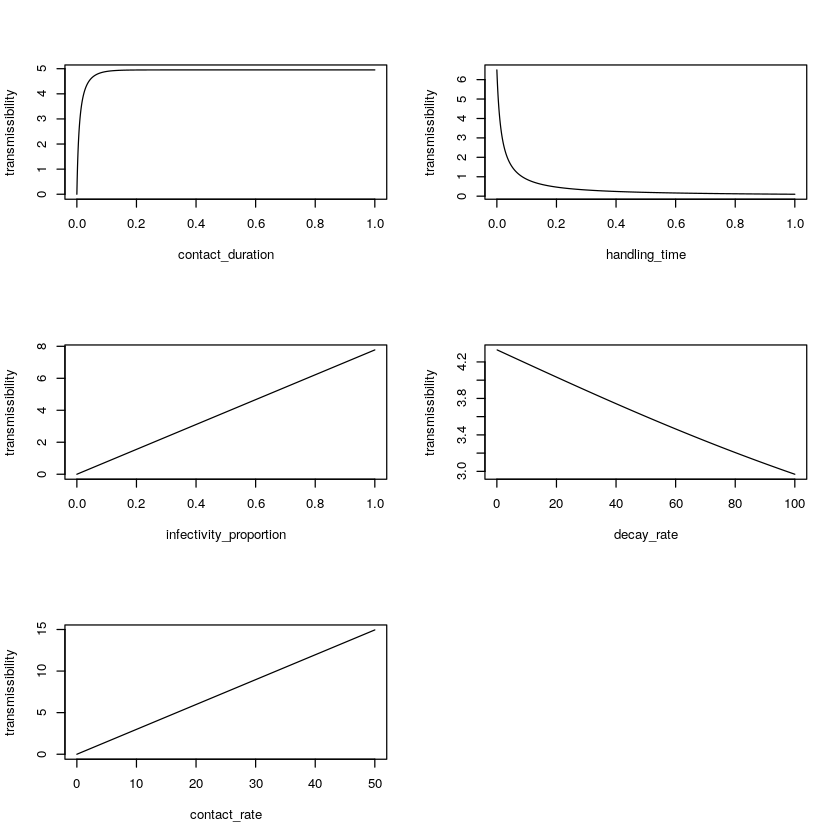

In [1]:
beta <-function(c_r,b,d,h,epsilon){
    return(c_r * epsilon *  (( (1 / b) * (1 - exp(- b * d)))/(( 1 / b) * (1 - exp(- b * d)) + h)))
}
             
#beta(c_r,b,d,h,epsilon)                                                 

parms = list(
contact_duration= 0.5 / 24,  #units -time(days)
handling_time=0.25 / 24, #days
infectivity_proportion=0.5, # maximum possibly transmissibility . not all contacts. eg in school
decay_rate= 30,  #decay (1/day)
contact_rate= 13
) #individuals/individual/day  
   
par(mfrow = c(3, 2))
for (i in 1:(length(parms))) {
  parmschange<- parms 
    if (i < 4) {
       x <- seq(0.000, 1, length.out = 1000)
        }
   if (i == 4){
        x <- seq(0.000, 100, length.out = 1000)
        }
   if (i == 5){
        x <- seq(0.000, 50, length.out = 1000)
        }

    parmschange[[i]] <- x
    transmissibility = beta(c_r= parmschange[["contact_rate"]],b= parmschange[["decay_rate"]],d= parmschange[["contact_duration"]],h= parmschange[["handling_time"]],epsilon= parmschange[["infectivity_proportion"]])
    
    plot(x,transmissibility, type = "l", xlab = names(parms[i]))
}




In [2]:
par(mfrow=c(2,1))

##########################################
cr_normal <- function(Combined_Climate, m , c, stype) {
    #parameters
    #m is the cooredinates where the contact rate is at a maximum 
    #c is 95 % confidence interval for duration
    #t range is the T values the function is calculated for
    #s type determines whether s is calculated using the upper or lower confidence interval
    c_u = c[2]
    c_l = c[1]
    m_C = m[1]
    m_cr = m[2]
    #find s
    if (stype==1){
       s = (c_u - m_C) / 1.96
       }else{
          s = -(c_l - m_C) / 1.96
       }
  #find y axis of normal distribution given s   
     scaling = sqrt(2 * pi) * s * m_cr

    return(scaling*(1 / (sqrt(2 * pi) * s))*exp((-(Combined_Climate - m_C) ^ 2) / (2 * s ^ 2)))
}


#this is where confidence_interval is used 
cr <- function(Max_Coordinates_cr,confidence_interval_cr, range, Combined_Climate) {
   #finds the equation fiven temp_at_max and range. then finds S for given T
   #uses where temp at max relates to range to determine stype (to determine whether lower or upper value of range is used to find SI)
   if (abs(Max_Coordinates_cr[1]-range[1])>abs(Max_Coordinates_cr[1]-range[2])){
      stype=0
      }else{
         stype=1
      }
   #finds d at T values for given parameters (contact finds equation using duration_normal_scaled)
   #t_range not strictly needed 
   #return(mean_duration(T = T,m = c(temp_at_max, max_mean_contact), c = confidence_interval, T_range = range, stype=stype))
   return(cr_normal(Combined_Climate = Combined_Climate,m = Max_Coordinates_cr, c = confidence_interval_cr, stype=stype))
   
}





#function for mean duration of contact
mean_duration_normal <- function(Combined_Climate, m , c, stype) {
    #parameters
    #m is the cooredinates where the duration is at a maximum 
    #c is 95 % confidence interval for duration
    #t range is the T values the function is calculated for
    #s type determines whether s is calculated using the upper or lower confidence interval
    #T = seq(T_range[1], T_range[2], length.out = 10000)
    c_u = c[2]
    c_l = c[1]
    m_C = m[1]
    m_d = m[2]
    #find s
    if (stype==1){
       s = (c_u - m_C) / 1.96
       }else{
          s = -(c_l - m_C) / 1.96
       }
  #find y acis of normal distribution given s   
   #N_D =  (1 / (sqrt(2 * pi) * s)) *  exp((-(T - m_T) ^ 2) / (2 * s ^ 2))
   #d = N_D * sqrt(2 * pi) * s
     scaling = sqrt(2 * pi) * s * m_d
 
   #plot(T,d)
   #return(c(scaling, m_T, s))
    return(scaling*(1 / (sqrt(2 * pi) * s))*exp((-(Combined_Climate - m_C) ^ 2) / (2 * s ^ 2)))
}

d <- function(Max_Coordinates_d, confidence_interval_d, range, Combined_Climate) {
   #finds the equation fiven temp_at_max and range. then finds duration for given Combined_Climate
   #uses where temp at max relates to range to determine stype (to determine whether lower or upper value of range is used to find SI)
   if (abs(Max_Coordinates_d[1]-range[1])>abs(Max_Coordinates_d[1]-range[2])){
      stype=0
      }else{
         stype=1
      }
   #finds d at T values for given parameters (contact finds equation using duration_normal_scaled)
   #t_range not strictly needed 
   #return(mean_duration(T = T,m = c(temp_at_max, max_mean_contact), c = confidence_interval, T_range = range, stype=stype))
   return(mean_duration_normal(Combined_Climate = Combined_Climate,m = Max_Coordinates_d, c = confidence_interval_d, stype=stype))

   
}
#estimating quadratic for mortality of virus
mortality_quadratic <- function(Combined_Climate, vertex , point) {
     
   #vertex is the maxima or minima, point is another point on the curve (usually min o)
   #scaled between 0 and 1 
   #finds a b and c
   #remember that applies only to C_range
   #find coefficients 
   # C_range is range of climate suitibilities
  
  
   a = ((point[2] - vertex[2]) / (point[1] - vertex[1]) ^ 2) 
  
   b = (((point[2] - vertex[2]) / (point[1] - vertex[1]) ^ 2) * -2 * vertex[1]) 
   
   c = (((point[2] - vertex[2]) / (point[1] - vertex[1]) ^ 2) * vertex[1] ^2 + vertex[2]) 
  
   return(a* Combined_Climate ^ 2 + b * Combined_Climate + c)
}
# if type of standard deviation (stype) ==1 then use upper to find s ,else use lower. 
#This is to solve the issue that if maximum occurs at upper confidence interval, s will be 0. 






q <- function(Max_Coordinates_q,Min_Coordinates_q, range, Combined_Climate) {
   #this function uses the temp at max and range to decide which end of range to allocate as minimum.
   #then finds the equation for the given range and temp at max and finds S for given T 
   #uses specific min and max y values. should probably move that to input
    
   # the temp at min is the lower end of the range when the temp at max is closer to the upper end of the range and vice versa
   #this is because the quadratic is symmetric and bounded     
   if (Max_Coordinates_q[1] > (range[2] - range[1]) / 2) {
       Min_Coordinates_q[1] <- range[1]
      }else{
        Min_Coordinates_q[1] <- range[2]
      } 
    #outputs y value for temperature when vertexc, T_range and point are at values here
    return(mortality_quadratic(Combined_Climate = Combined_Climate, vertex = Max_Coordinates_q, point=Min_Coordinates_q))
}


In [3]:
#Estimating mean contact duration


library(socialmixr)
data("polymod")
data <- polymod$contacts
contact_table <- table(data$part_id, data$duration_multi)
#seems to be shifted 
del <- as.numeric(names(which(contact_table[, 1] > 0)))
data <- data[which(data$part_id != del), ]
contact_table <- table(data$part_id, data$duration_multi)
con <- as.matrix(contact_table)
#midpoints <- c(2.5, 10, 15 + (60 - 45) / 2, 150, 4 * 60)
#time <- midpoints * con / 60

#timebyrow <- apply(time, 1, sum)
#meancont<-mean(timebyrow)
#maxcont<-meancont+2*sqrt(var(timebyrow))

#max(timebyrow)
#min(timebyrow)
timebyrow <- rowSums(con)

meancontactno<-mean(timebyrow)
#varcontactno<-var(timebyrow)

numberbycol<- colSums(con)
#numberbycol
#most frequently- 4h+ so est 4h?



#setting parameters 
#S
max_survival<- -0.0001
min_survival<- -40
Max_Coordinates_q<-c(NA,max_survival)
Min_Coordinates_q<-c(NA,min_survival)

# d
max_mean_contact<-4/24
confidence_interval_d<-c(20,80)
Max_Coordinates_d<-c(NA,max_mean_contact)
#cr
confidence_interval_cr<-c(20,80)
max_contact_no<-40
Max_Coordinates_cr<-c(NA,max_contact_no)



range=c(0,100)
#used for lots of things. seperate?






Attaching package: ‘socialmixr’

The following object is masked from ‘package:utils’:

    cite



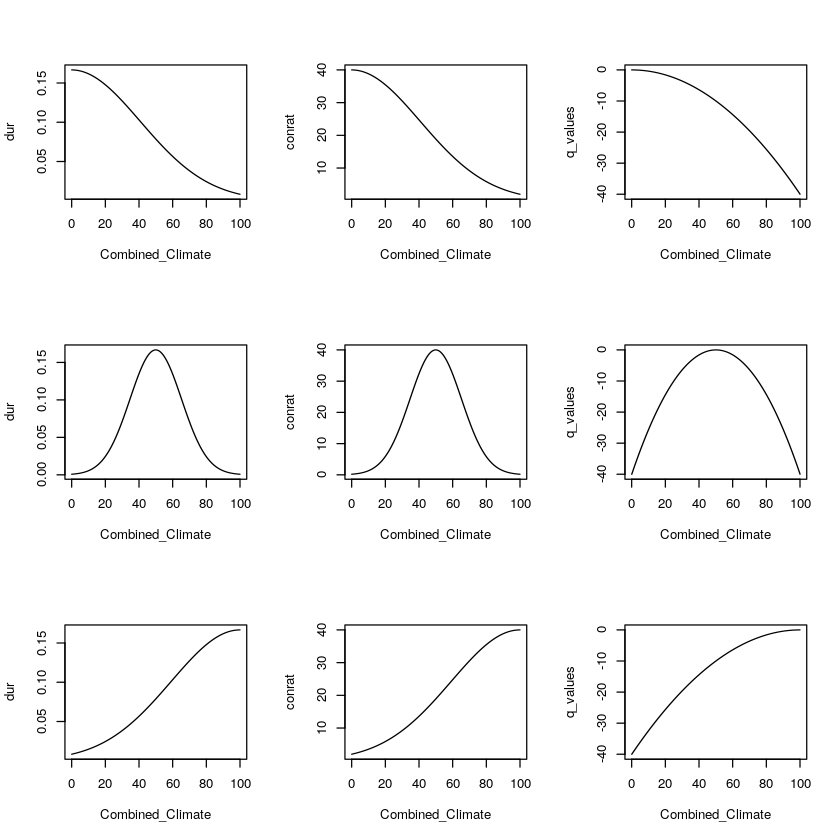

In [4]:
#plotting the curve for a given range with different peaks for d, s and cr

plot_different_max<-function(range){
   par(mfrow=c(3,3))
   maxvec<-c(range[1],range[1] +((range[2] - range[1]) / 2),range[2])
   Combined_Climate = seq(range[1], range[2] , length.out = 1000)
   for (i in maxvec) {
       #uses the value of maxvec to "decide" stype(decide whether lower or upper confidence interval is used to calculate standard deviation)
       #find C and plot given specific parameters
      
      #choose climate it peaks at
      Max_Coordinates_d[1]<-i
      Max_Coordinates_cr[1]<-i
      Max_Coordinates_q[1]<-i

      dur= d(Combined_Climate =  Combined_Climate,Max_Coordinates_d = Max_Coordinates_d, range=range, confidence_interval_d = confidence_interval_d )
      plot(Combined_Climate, dur, type = "S")
      conrat=cr(Combined_Climate =  Combined_Climate,Max_Coordinates_cr = Max_Coordinates_cr, range=range, confidence_interval_cr = confidence_interval_cr)
      plot(Combined_Climate, conrat, type = "S")
      q_values= q(Combined_Climate=Combined_Climate, range=range, Max_Coordinates_q = Max_Coordinates_q ,Min_Coordinates_q = Min_Coordinates_q)
      plot(Combined_Climate, q_values, type = "s")
   } 

}
plot_different_max(range)


#b=-q. These graphs show peak varying according to what is best for virus

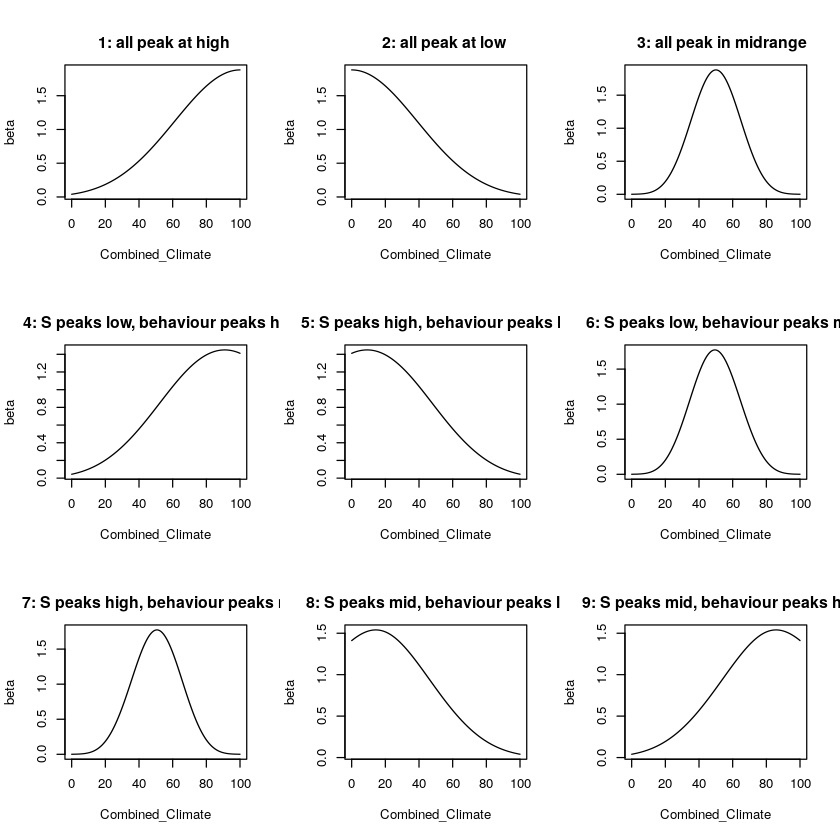

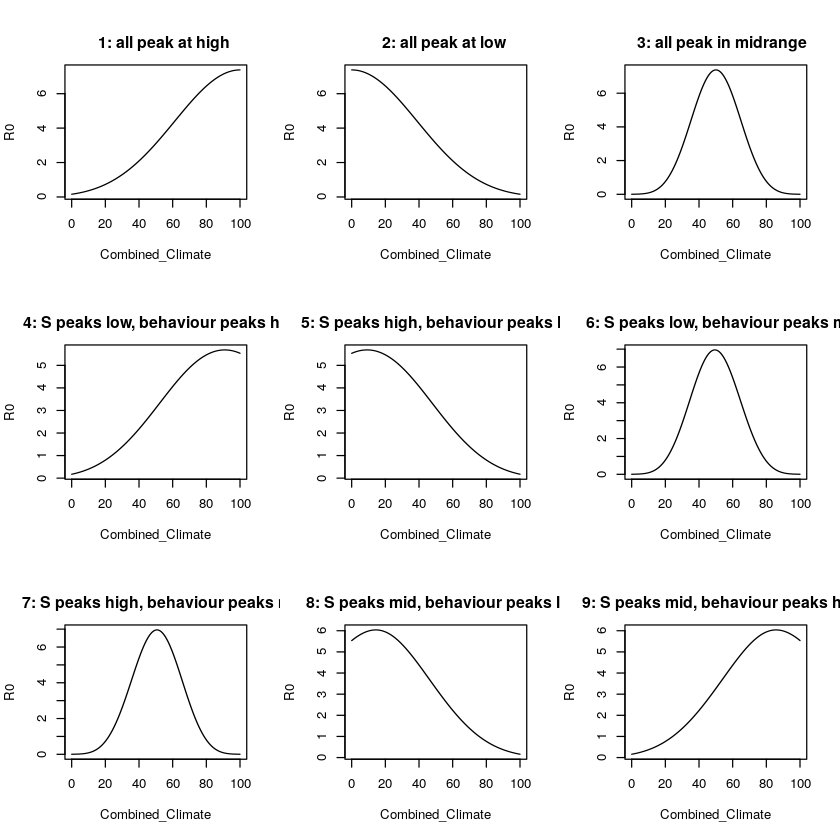

In [5]:
#plotting R0 and beta
plot_matrix<-function(h,epsilon,mu,sigma,alpha,gamma,range, plot_what, label){
   
    par(mfrow = c(3, 3))
    
    Combined_Climate<- seq(range[1], range[2] , length.out = 1000)

    #completely susceptible population
    #maxes is a matrix with different combinations of maximum for S, cr ,d 

    maxes<-matrix(c(range[2],range[2],range[2],range[1],range[1],range[1],
                range[1] +((range[2] - range[1]) / 2), range[1] + ((range[2] - range[1]) / 2),range[1] + ((range[2] - range[1]) / 2),
                range[1],range[2],range[2],
                range[2],range[1],range[1],
                range[1],range[1] +((range[2] - range[1]) / 2), range[1] + ((range[2] - range[1]) / 2),
                range[2],range[1] +((range[2] - range[1]) / 2), range[1] + ((range[2] - range[1]) / 2),
                range[1] +((range[2] - range[1]) / 2),range[1],range[1],
                range[1] +((range[2] - range[1]) / 2),range[2],range[2]),
                byrow=T, nrow=9,ncol=3)
    #titles corresponding to rows in matrix
    titles<-c("
    1: all peak at high","
    2: all peak at low","
    3: all peak in midrange ","
    4: S peaks low, behaviour peaks high","
    5: S peaks high, behaviour peaks low ","
    6: S peaks low, behaviour peaks mid","
    7: S peaks high, behaviour peaks mid","
    8: S peaks mid, behaviour peaks low","
    9: S peaks mid, behaviour peaks high")

    for (a in 1:nrow(maxes)){
          Max_Coordinates_d[1]<-maxes[a,3]
          Max_Coordinates_cr[1]<-maxes[a,2]
          Max_Coordinates_q[1]<-maxes[a,1]
     
          d_value= d(Combined_Climate =  Combined_Climate,Max_Coordinates_d = Max_Coordinates_d, range=range, confidence_interval_d = confidence_interval_d )

          cr_value=cr(Combined_Climate =  Combined_Climate,Max_Coordinates_cr = Max_Coordinates_cr, range=range, confidence_interval_cr = confidence_interval_cr)

          b_value= -1 * q(Combined_Climate=Combined_Climate, range=range, Max_Coordinates_q = Max_Coordinates_q ,Min_Coordinates_q = Min_Coordinates_q)


          beta_value = beta(c_r = cr_value,b =b_value ,d = d_value,h =h ,epsilon =epsilon )
          R_0 <-(sigma / (sigma + mu)) * beta_value/(mu + alpha + gamma)
          if (label=="beta"){
              plot(Combined_Climate, beta_value, type = "s" ,main=titles[a], ylab=label)
          }else{
              plot(Combined_Climate, R_0, type = "s" ,main=titles[a], ylab=label)

          }
    }
       
}
plot_matrix(h=0.25 / 24,epsilon=0.05,mu = 0,sigma = 0.25,alpha = 0.005,gamma = 0.25,range = c(0,100),label="beta")

plot_matrix(h=0.25 / 24,epsilon=0.05,mu = 0,sigma = 0.25,alpha = 0.005,gamma = 0.25,range = c(0,100),label="R0")


#1 all peak at high Combined_Climate
#2 all peak at low Combined_Climate
#3 all peak in midrange Combined_Climate
#4 S peaks low, behaviour peaks high
#5 S peaks high, behaviour peaks low 
#6 S peaks low, behaviour peaks mid
#7 S peaks high, behaviour peaks mid
#8 S peaks mid, behaviour peaks low
#9 S peaks mid, behaviour peaks high

In [6]:
require("epimdr")


Loading required package: epimdr
Loading required package: shiny
Loading required package: deSolve
Loading required package: polspline


In [11]:
Combined_Climate_Function<- function(time,min,max) {
  # here, climate is varying with time at a yearly cycle.
  return((max-min)/2 * cos((2 * pi / 365)* time - pi) + (max+min)/2)
}


SEIR_model <- function(time, values, parms) {
   #function where c changes with the climate and humidity at each timepoint
   #initial values
   S <- values[1]
   E <- values[2]
   I <- values[3]
   R <- values[4]
   N <- values[5]
   #parameters
   mu <- parms[["mu"]]
   sigma <- parms[["sigma"]]
   alpha <- parms[["alpha"]]
   gamma <- parms[["gamma"]]
   h <- parms[["h"]]
   epsilon <- parms[["epsilon"]]
   range <-parms[["range"]]
   nu <- parms[["nu"]]
   p <- parms[["choose"]]

   #find climate given time
   Combined_Climate <- Combined_Climate_Function(time=time,min=range[1],max=range[2]) 
    
   Max_Coordinates_d[1]<-maxes[p,3]
   Max_Coordinates_cr[1]<-maxes[p,2]
   Max_Coordinates_q[1]<-maxes[p,1]
    
   d_value= d(Combined_Climate =  Combined_Climate,Max_Coordinates_d = Max_Coordinates_d, range=range, confidence_interval_d = confidence_interval_d )
   cr_value=cr(Combined_Climate =  Combined_Climate,Max_Coordinates_cr = Max_Coordinates_cr, range=range, confidence_interval_cr = confidence_interval_cr)
   b_value= -1 * q(Combined_Climate = Combined_Climate,range=range, Max_Coordinates_q = Max_Coordinates_q ,Min_Coordinates_q = Min_Coordinates_q)

   beta_value = beta(c_r = cr_value,b =b_value ,d = d_value,h =h ,epsilon =epsilon )    
   
    #seir model
   dS = nu * N - beta_value * I * S / N - mu * S 
   dE = beta_value * S * I / N - (sigma + mu) * E
   dI = sigma * E - (alpha + mu + gamma) * I
   dR = gamma * I - mu * R 
   dN = nu * N - alpha * I - mu * (S + E + I + R)
  
    list(c(dS, dE, dI, dR, dN))
}



plottime <- function(start, time, model, parms) {
   #plotting seir components over time
   out = ode(    y = start,    time = time,    func = model,    parms = parms  )
   p <- parms[["choose"]]
   plot(x = out[, "time"], y= out[, "S"], ylab = "Number", xlab = "Time",
        type = "l", xlim=c(min(time), max(time)),ylim=c(0, parms[["N"]]))
   lines(x = out[, "time"],y= out[, "E"], col = "orange")
   lines(x = out[, "time"],y= out[, "I"], col = "red")
   lines(x = out[, "time"],y= out[, "R"], col = "green")
   lines(x = out[, "time"],y= out[, "N"], col = "purple")  
   abline(h = max(out[,"I"]),lty=3,col="red")
   legend( "bottomright",legend = c("S", "E", "I", "R","N","Max I"), 
          col = c("black", "orange", "red", "green","purple","red"), lty = c(1,1,1,1,1,3), cex = 0.8)
   
   maxpercent=max(( out[, "I"]/ out[, "N"])*100)
   maximum= paste("Maximum I is:",round(maxpercent,digits = 2),"%")
   text(max(time)/2, max(out[, "N"]),maximum)
   title(main=paste("q peaks at",maxes[p,1],", cr peaks at",maxes[p,2], ", d peaks at",maxes[p,3]))
    #plotting infection numbers over time
   # plot(x = out[, "time"],   y= out[, "I"] ,    ylab = "Number",   xlab = "Time",    
    #   type = "l",   xlim=c(min(time), max(time)),  ylim=c(0, max(out[,"I"]))) 
}


plot_maxes_series<-function(parms,start,time,maxes,titles, model){
   par(mfrow=c(3,3))
    for (p in 1:nrow(maxes)){
    parms[["choose"]] <- p
    #png(paste("../../Results/Series/Series_",p,".png"))
    plottime(time = time, parms = parms, start = start,  model = model)
    #dev.off()
    }
}



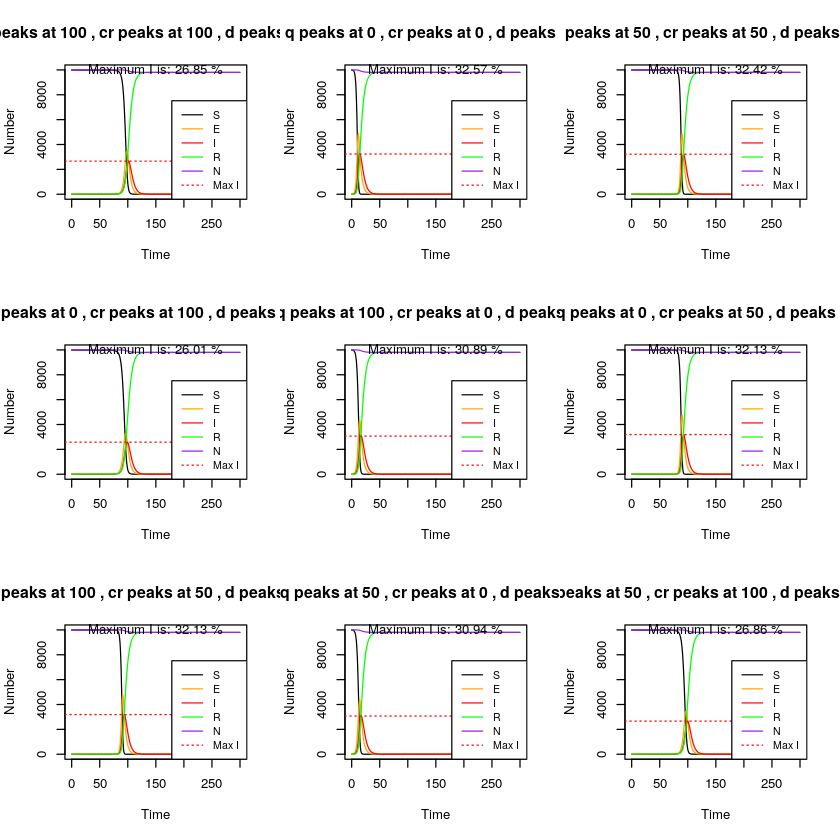

In [12]:
maxes<-matrix(c(range[2],range[2],range[2],range[1],range[1],range[1],
                range[1] +((range[2] - range[1]) / 2), range[1] + ((range[2] - range[1]) / 2),range[1] + ((range[2] - range[1]) / 2),
                range[1],range[2],range[2],
                range[2],range[1],range[1],
                range[1],range[1] +((range[2] - range[1]) / 2), range[1] + ((range[2] - range[1]) / 2),
                range[2],range[1] +((range[2] - range[1]) / 2), range[1] + ((range[2] - range[1]) / 2),
              range[1] +((range[2] - range[1]) / 2),range[1],range[1],
              range[1] +((range[2] - range[1]) / 2),range[2],range[2]),
              byrow=T, nrow=9,ncol=3)
   titles<-c("
    1: all peak at high","
    2: all peak at low","
    3: all peak in midrange ","
    4: S peaks low, behaviour peaks high","
    5: S peaks high, behaviour peaks low ","
    6: S peaks low, behaviour peaks mid","
    7: S peaks high, behaviour peaks mid","
    8: S peaks mid, behaviour peaks low","
    9: S peaks mid, behaviour peaks high")

parms = list( mu = 00.000,sigma = 0.25 ,alpha = 0.005, gamma =0.25,
               N = 10000, nu = 0.0, range = range, h=0.25 / 24 ,epsilon= 0.1, choose=NA)

start = c(S = 0.999*parms[["N"]],
          E = 0.001*parms[["N"]],
          I = 0.00*parms[["N"]],
          R = 0*parms[["N"]],
          N = parms[["N"]])
time = seq(0,300, by = 0.01)


plot_maxes_series(parms=parms,start=start,time=time,maxes=maxes,titles=titles, model=SEIR_model)

|Parameter|Meaning|Unit|Origin|
|------|------|------|------|
|$\alpha$     |rate of disease induced mortality (per capita?)   |unit time$^{-1}$  |Bjørnstad 2018|
|$\beta$     |transmission rate per infective    | individiaul/(individual x unit time)$^{-1}$   |Keeling and Rohani 2007|
|$\gamma$     |recovery rate - probably of recovery for an individual per unit time (reciprocal of infectious period)   |unit time$^{-1}$  |Keeling and Rohani 2007|
|$\mu$    |natural per capita death rate -not caused by disease|unit time$^{-1}$    |Keeling and Rohani 2007|
|$\nu$    |natural per capita birth rate |unit time$^{-1}$  |Keeling and Rohani 2007|
|$\sigma$     |rate of movement from E to I (reciprocal of latent period)|unit time$^{-1}$|  Keeling and Rohani 2007|
|$S$     |number of susceptibles    |  individuals |Keeling and Rohani 2007|
|$E$     |number of exposed |  individuals  |Keeling and Rohani 2007|
|$I$     |number of infected     |  individuals |Keeling and Rohani 2007|
|$R$     |number of recovered    | individuals |Keeling and Rohani 2007|
|$N$     |number of individauls   | individuals |Keeling and Rohani 2007|
|$T$  |temperature |degrees c|-|
|$RH$   |relative humidity|%|-|
|$m$ |containment parameter|-|Neher 2020|
|$k$   |inflection point of Hill function||Neher 2020|
|$H$  |dimensionless hill function- containment |-|Neher 2020|
|$d$  |average contact duration|unit time|-|
|$s$  |Standard distribution of normal distribution|-|-|
|$m_T$,$m_d$ |Temperature and duration at maximum duration |degrees C, unit time|-|
|$c_l$,$c_u$|lower, upper interval at which 95\%  of the duration is likely to occur |-|-|
|$q$   |viral rate of growth|$time^{-1}$||
|$c_r$ |contact rate per unit time  |(individuals/(individual x time)|valle 2013|  
|$\epsilon$|proportion of contacts that can cause transmission|proportion|valle 2013|
|$\tau$ |the susceptibility of the susceptible|proportion|valle 2013|  
|$\zeta$| the number of transmission events per unit time| (1/time)|valle 2013|  
|d | average contact duration of a contact| (time) |valle 2013|    
|V |the net amount of virus per individual shedding |(titre/individual) || 
|a| the amount of virus shed per individual per unit time |(titre/(time x individual)  ||
|b | the rate of decay of the virus| (1/time)|-q|  
|h | the expected duration of contact needed for tramsmission| (time)| (inverse of $\zeta$)|





units calculated from:  
units of de/dt,ds/st,di/dt, dr/dt$N\times$unit time$^{-1}$ 
